In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df= pd.read_csv('kc_house_data.csv')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


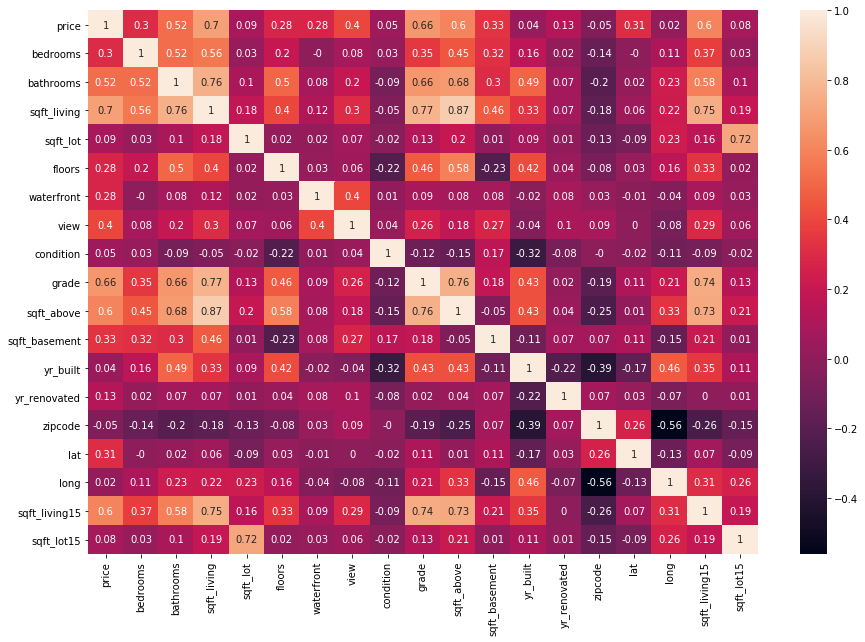

In [7]:
plt.figure(figsize=(15,10))
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [8]:
X = df.drop(["price"],axis = 1)

y = df["price"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
X_train.shape

(13290, 18)

In [12]:
y_train.shape

(13290,)

In [13]:
X_test.shape

(3323, 18)

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 198095.1210775296
R2 score is 0.6978317762321289




In [19]:
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 42)  
  
# fit the regressor with X and Y data 
regressor.fit(X, y) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [20]:
y_pred = regressor.predict(X_train)

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 1302.4726109857036
Mean Squared Error: 134886586.86696765
Root Mean Squared Error: 11614.06848899074


In [28]:
r2 = r2_score(y_train, y_pred)
r2

0.9989613481511205

In [26]:
# create a regressor object 
regressor = DecisionTreeRegressor(max_depth = 3, random_state = 42)  
  
# fit the regressor with X and Y data 
regressor.fit(X, y) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [29]:
y_pred = regressor.predict(X_train)

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 135316.25522107747
Mean Squared Error: 51050983946.76716
Root Mean Squared Error: 225944.64797106205


In [32]:
y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
r2

0.6326622103185287

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [35]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

#print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Test data R-2 score: 0.856
Test data Spearman correlation: 0.946
Test data Pearson correlation: 0.928


In [36]:
#predicted_test
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_test))

Mean Absolute Error: 72195.16989965994


In [37]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [38]:
predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)
test_score = r2_score(y_test, predicted_test)

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_test)))

Mean Absolute Error: 77268.33926672685
Mean Squared Error: 25422553608.691845
Root Mean Squared Error: 159444.51576862668


In [40]:
r2 = r2_score(y_test, predicted_test)
r2

0.8329091396567195

In [41]:
test_score

0.8329091396567195

In [45]:
data = pd.read_csv('liver_patient_new_quiz_2_3.csv')
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         500 non-null    int64  
 1   Gender                      500 non-null    object 
 2   Total_Bilirubin             500 non-null    float64
 3   Direct_Bilirubin            500 non-null    float64
 4   Alkaline_Phosphotase        500 non-null    int64  
 5   Alamine_Aminotransferase    500 non-null    int64  
 6   Aspartate_Aminotransferase  500 non-null    int64  
 7   Total_Protiens              500 non-null    float64
 8   Albumin                     500 non-null    float64
 9   Albumin_and_Globulin_Ratio  496 non-null    float64
 10  Liver_Problem               500 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 43.1+ KB


In [47]:
data = pd.get_dummies(data, columns=['Gender'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         500 non-null    int64  
 1   Total_Bilirubin             500 non-null    float64
 2   Direct_Bilirubin            500 non-null    float64
 3   Alkaline_Phosphotase        500 non-null    int64  
 4   Alamine_Aminotransferase    500 non-null    int64  
 5   Aspartate_Aminotransferase  500 non-null    int64  
 6   Total_Protiens              500 non-null    float64
 7   Albumin                     500 non-null    float64
 8   Albumin_and_Globulin_Ratio  496 non-null    float64
 9   Liver_Problem               500 non-null    int64  
 10  Gender_Female               500 non-null    uint8  
 11  Gender_Male                 500 non-null    uint8  
dtypes: float64(5), int64(5), uint8(2)
memory usage: 40.2 KB


In [48]:
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [50]:
data['Albumin_and_Globulin_Ratio'].isnull().sum()

4

In [54]:
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean(), inplace=True)

In [53]:
data['Albumin_and_Globulin_Ratio'].mean()

0.9609072580645165

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         500 non-null    int64  
 1   Total_Bilirubin             500 non-null    float64
 2   Direct_Bilirubin            500 non-null    float64
 3   Alkaline_Phosphotase        500 non-null    int64  
 4   Alamine_Aminotransferase    500 non-null    int64  
 5   Aspartate_Aminotransferase  500 non-null    int64  
 6   Total_Protiens              500 non-null    float64
 7   Albumin                     500 non-null    float64
 8   Albumin_and_Globulin_Ratio  500 non-null    float64
 9   Liver_Problem               500 non-null    int64  
 10  Gender_Female               500 non-null    uint8  
 11  Gender_Male                 500 non-null    uint8  
dtypes: float64(5), int64(5), uint8(2)
memory usage: 40.2 KB


In [57]:
X = data.drop('Liver_Problem',axis =1 )
y = data["Liver_Problem"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [62]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.30      0.40        27
           1       0.78      0.93      0.85        73

    accuracy                           0.76       100
   macro avg       0.70      0.61      0.62       100
weighted avg       0.74      0.76      0.73       100



In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [67]:
predicted_test = rf.predict(X_test)

In [69]:
#true negative rate, TN/(TN+FP)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predicted_test)
confusion_matrix

array([[14, 13],
       [15, 58]], dtype=int64)

In [ ]:
#TP FP
#FN TN

In [70]:
tnr = 58/(58+13)
tnr

0.8169014084507042

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           0       0.48      0.52      0.50        27
           1       0.82      0.79      0.81        73

    accuracy                           0.72       100
   macro avg       0.65      0.66      0.65       100
weighted avg       0.73      0.72      0.72       100



In [72]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [73]:
predicted_test = rf.predict(X_test)

In [74]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           0       0.48      0.52      0.50        27
           1       0.82      0.79      0.81        73

    accuracy                           0.72       100
   macro avg       0.65      0.66      0.65       100
weighted avg       0.73      0.72      0.72       100



In [75]:
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
logit_roc_auc

0.6139015728056824